# EDA

In [1]:
library(tidyverse)
library(ggplot2)
library(corrplot)
library(VIM)
library(vcd)
library(DataExplorer)
library(FactoMineR)
library(factoextra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Loading required package: colorspace

Loading required package: grid

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding 

In [2]:
ps_df <- read_csv("../../data/unprocessed/PS_LR-all-tags/PS_LR_968-tags_Expert.csv")
head(ps_df, 10)

Rows: 970 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): individuo, lateralidad, ArticularFace, IrregularPorosity, UpperSym...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


individuo,lateralidad,ArticularFace,IrregularPorosity,UpperSymphysialExtremity,BonyNodule,LowerSymphysialExtremity,DorsalMargin,DorsalPlateau,VentralBevel,VentralMargin,Phase,Edad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
348,0,4,1,1,0,1,2,0,1,2,10,60
395,0,3,2,1,0,1,2,1,2,2,10,60
474,0,4,1,1,0,1,2,0,2,2,10,60
480,0,4,1,1,0,1,2,0,1,2,10,60
532,0,3,1,1,0,1,2,0,0,3,10,60
32,0,3,1,1,0,1,2,0,0,1,10,59
145,0,4,2,1,0,1,2,0,1,2,10,59
240,0,4,0,1,0,1,1,0,0,2,10,59
259,0,4,0,1,0,1,2,0,0,2,10,59


In [3]:
cols <- c("id", "lat", "af",
          "ip", "use",
          "bn", "lse",
          "dm", "dp", "vb",
          "vm", "t_phase", "age")
colnames(ps_df) <- cols
head(ps_df)

id,lat,af,ip,use,bn,lse,dm,dp,vb,vm,t_phase,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
348,0,4,1,1,0,1,2,0,1,2,10,60
395,0,3,2,1,0,1,2,1,2,2,10,60
474,0,4,1,1,0,1,2,0,2,2,10,60
480,0,4,1,1,0,1,2,0,1,2,10,60
532,0,3,1,1,0,1,2,0,0,3,10,60
32,0,3,1,1,0,1,2,0,0,1,10,59


In [4]:
ps_df_fct <- ps_df %>% mutate(t_phase = as.factor(t_phase))
ps_df_fct <- ps_df %>% mutate(age = as.factor(age))

In [5]:
ps_df_fct <- ps_df_fct %>% mutate(lat = factor(lat, labels = c("L", "R")))

In [6]:
ps_df_fct <- ps_df_fct %>% mutate(af = factor(af))
ps_df_fct <- ps_df_fct %>% mutate(ip = factor(ip))
ps_df_fct <- ps_df_fct %>% mutate(use = factor(use))
ps_df_fct <- ps_df_fct %>% mutate(bn = factor(bn))
ps_df_fct <- ps_df_fct %>% mutate(lse = factor(lse))
ps_df_fct <- ps_df_fct %>% mutate(dm = factor(dm))
ps_df_fct <- ps_df_fct %>% mutate(dp = factor(dp))
ps_df_fct <- ps_df_fct %>% mutate(vb = factor(vb))
ps_df_fct <- ps_df_fct %>% mutate(vm = factor(vm))

In [7]:
ps_df_fct %>% summary()

       id        lat     af      ip      use     bn      lse     dm     
 Min.   :  1.0   L:484   0: 35   0:634   0: 47   0:884   0: 91   0: 61  
 1st Qu.:134.0   R:486   1: 23   1:303   1:923   1: 86   1:879   1:216  
 Median :285.0           2: 34   2: 33                           2:693  
 Mean   :281.8           3:240                                          
 3rd Qu.:427.8           4:638                                          
 Max.   :567.0                                                          
                                                                        
 dp      vb      vm         t_phase            age     
 0:877   0:340   0: 94   Min.   : 1.000   51     : 42  
 1: 92   1:356   1:142   1st Qu.: 6.000   49     : 38  
 2:  1   2:274   2:600   Median : 8.000   30     : 37  
                 3:125   Mean   : 7.438   47     : 36  
                 4:  9   3rd Qu.:10.000   54     : 36  
                         Max.   :10.000   52     : 35  
                        

In [12]:
save <- TRUE

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


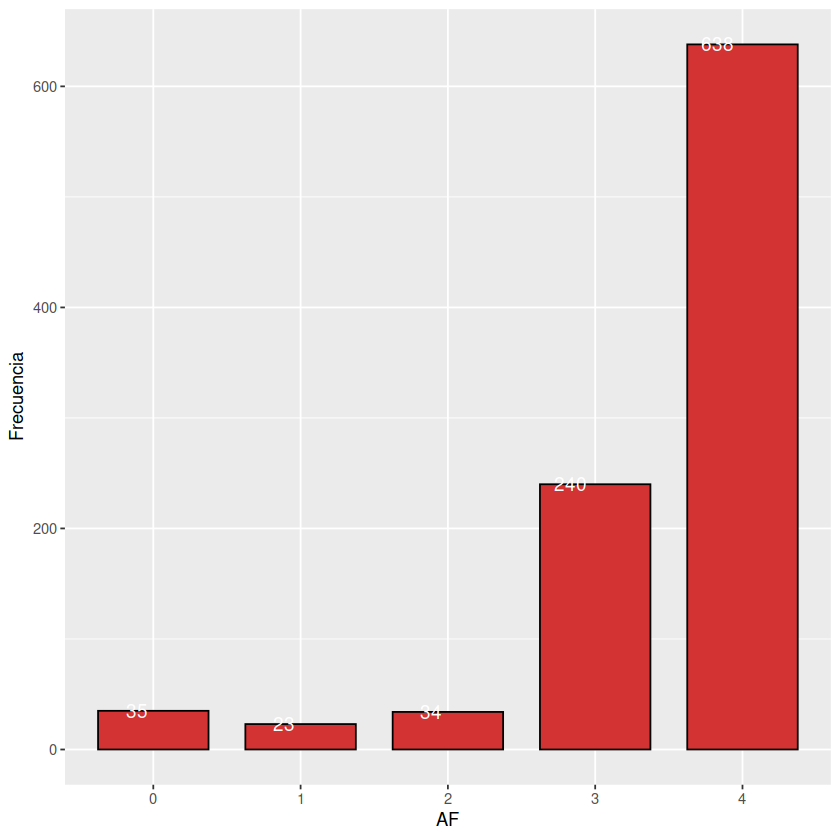

In [ ]:
colNames <- c("af", "ip", "use", "bn", "lse", "dm", "dp", "vb", "vm")
# colStrNames <- c("Articular Face", "Irregular Porosity", "Upper Symphysial Extremity", "Bony Nodule", "Lower Symphysial Extremity", "Dorsal Margin", "Dorsal Plateau", "Ventral Bevel", "Ventral Margin")
colStrNames <- c("AF", "IR", "USE", "BN", "LSE", "DM", "DP", "VB", "VM")
for(i in 1:1)
{
  plt <- ggplot(ps_df_fct, aes(x=.data[[colNames[i]]])) +
  geom_bar(stat = "count", width = 0.75, fill = "#d33333", color = "black") +
  labs(x = colStrNames[i], y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", colNames[i], "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }
}

# AF

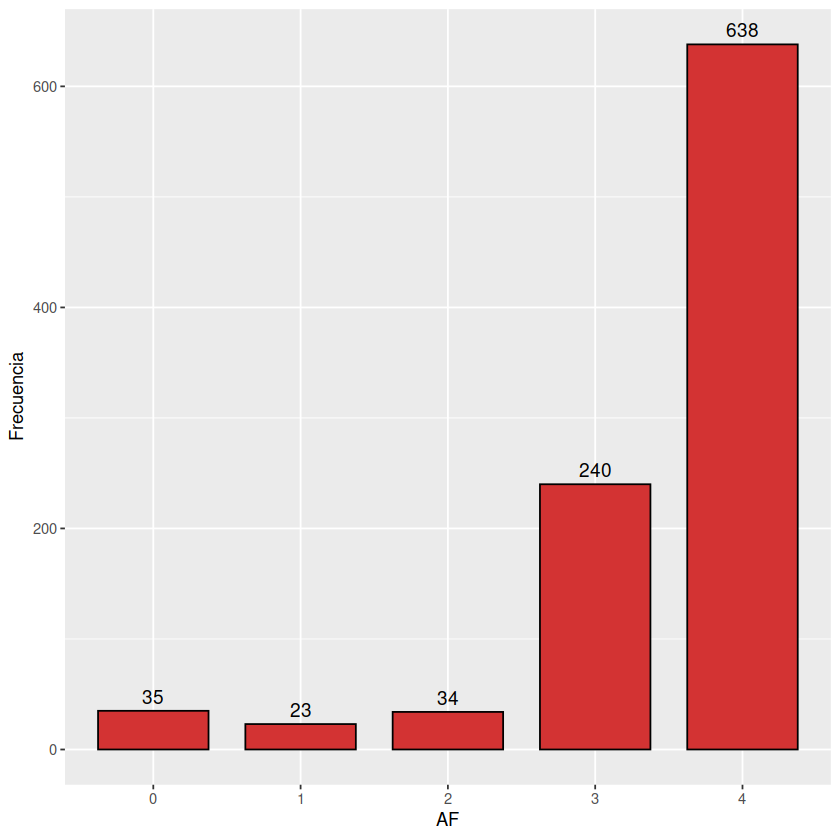

In [24]:
  
  act_char <- "af"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.75, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#000000", size = 4, aes(label = ..count..), vjust=-0.5)
  # facet_wrap(~ lat)
  # coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr_vert.pdf")
    ggsave(save_path, width = 3, height = 4)
  }

# BN

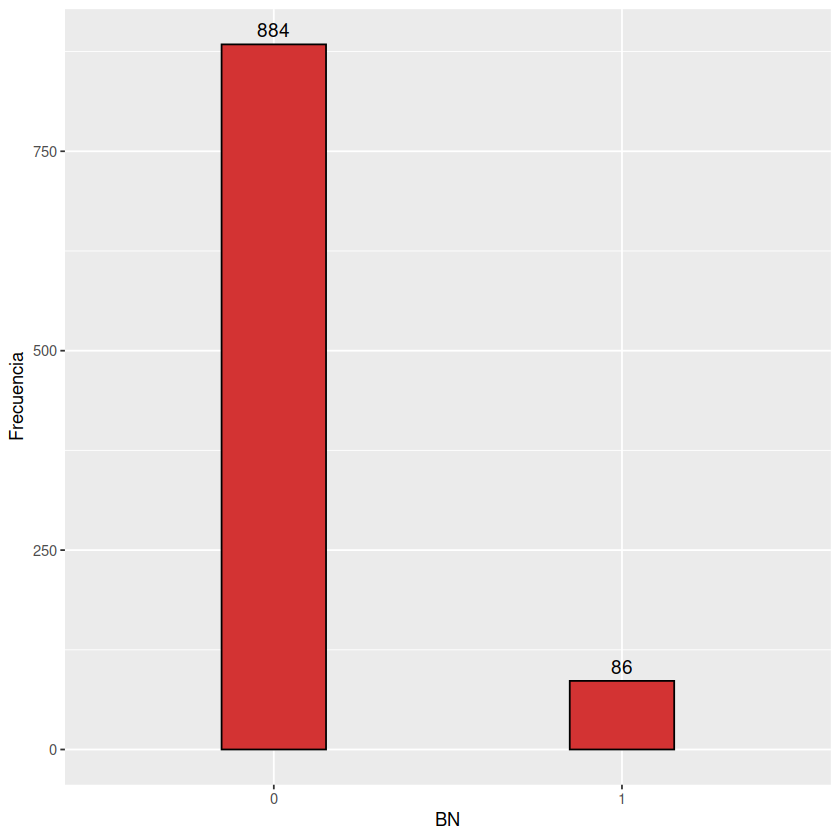

In [26]:
  act_char <- "bn"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.3, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#000000", size = 4, aes(label = ..count..), vjust=-0.5) #+
  # facet_wrap(~ lat)
  # coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr_vert.pdf")
    ggsave(save_path, width = 3, height = 4)
  }

# DM

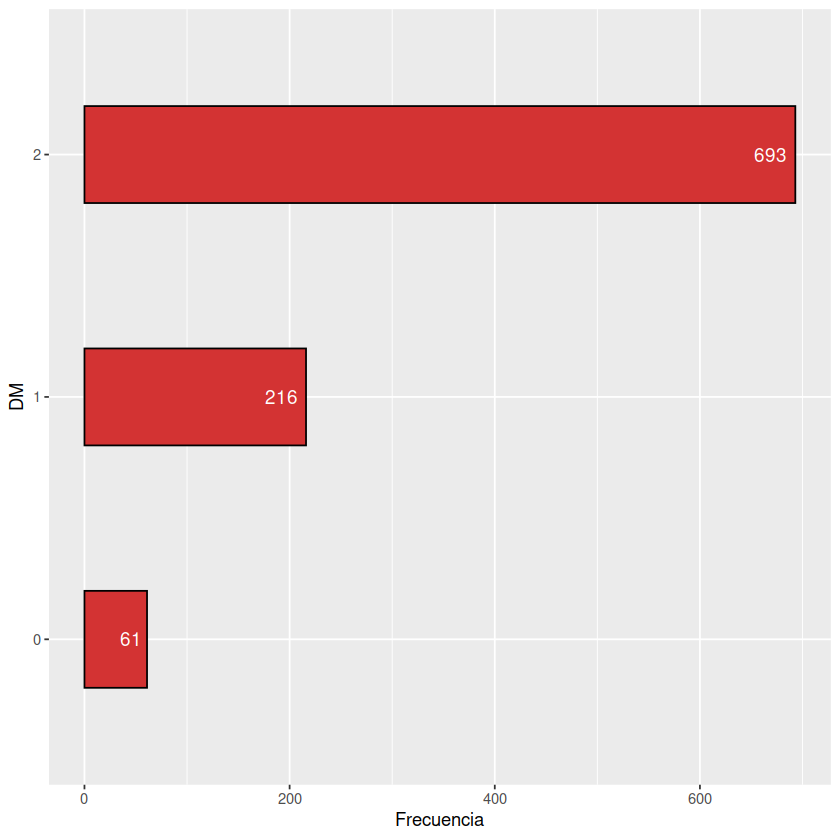

In [91]:
  act_char <- "dm"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.4, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# DP

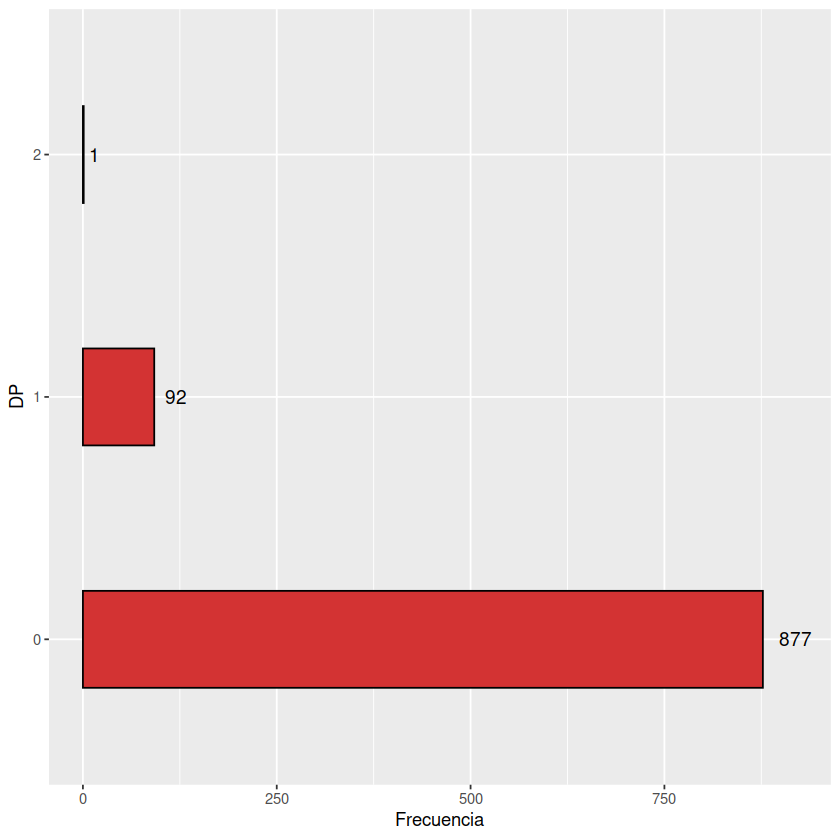

In [117]:
  act_char <- "dp"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.4, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#000000", size = 4, aes(label = ..count..), hjust=-0.5) +
  # facet_wrap(~ lat)
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.1)))+
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# IP

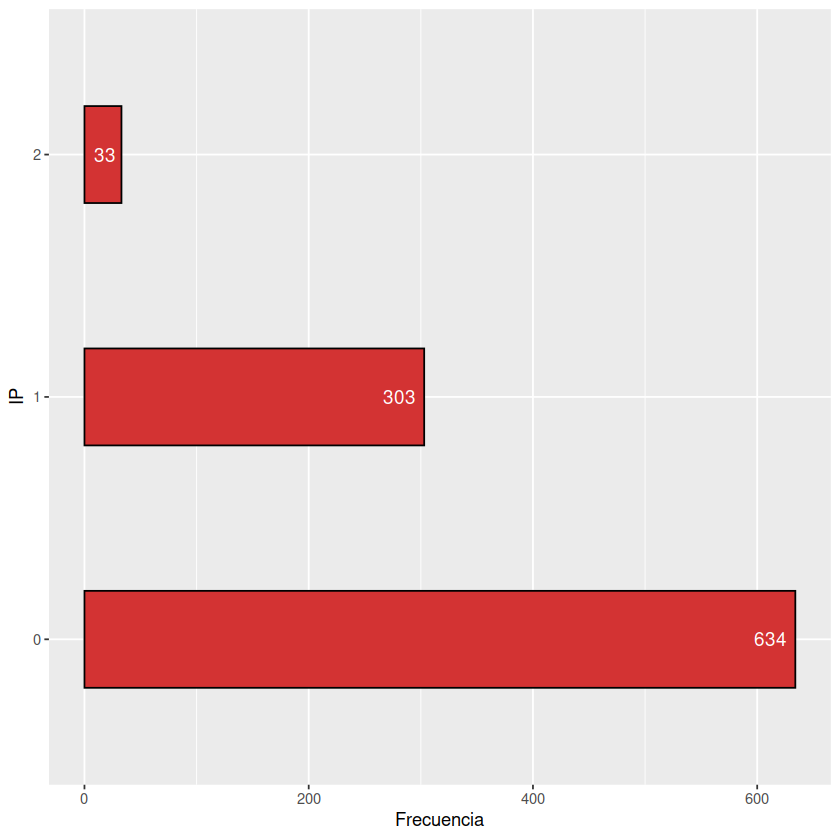

In [118]:
  act_char <- "ip"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.4, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# LSE

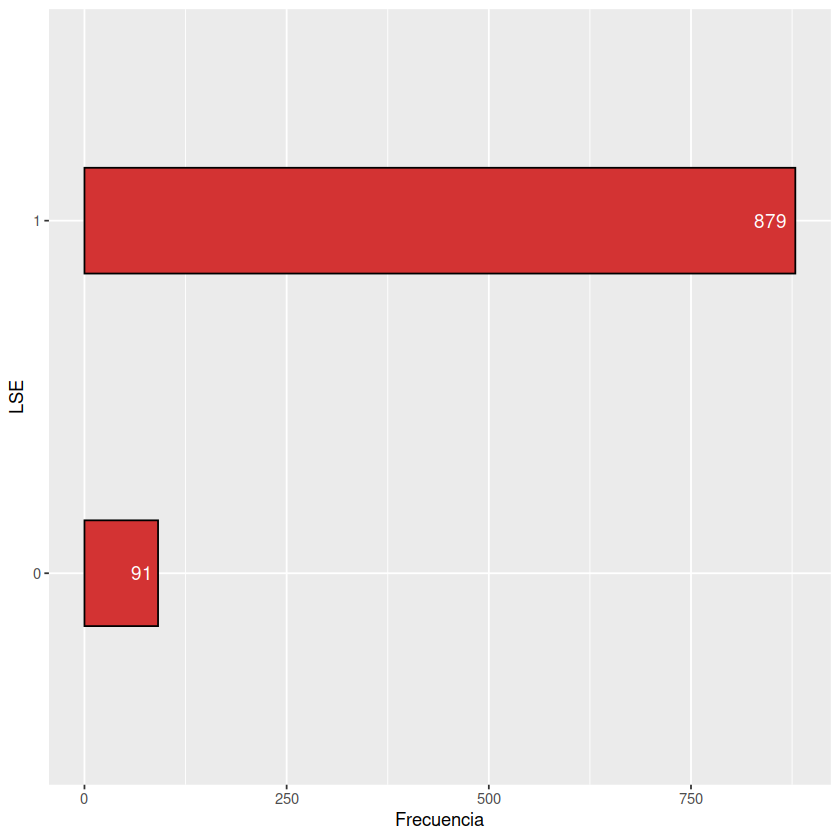

In [119]:
  act_char <- "lse"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.3, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# USE

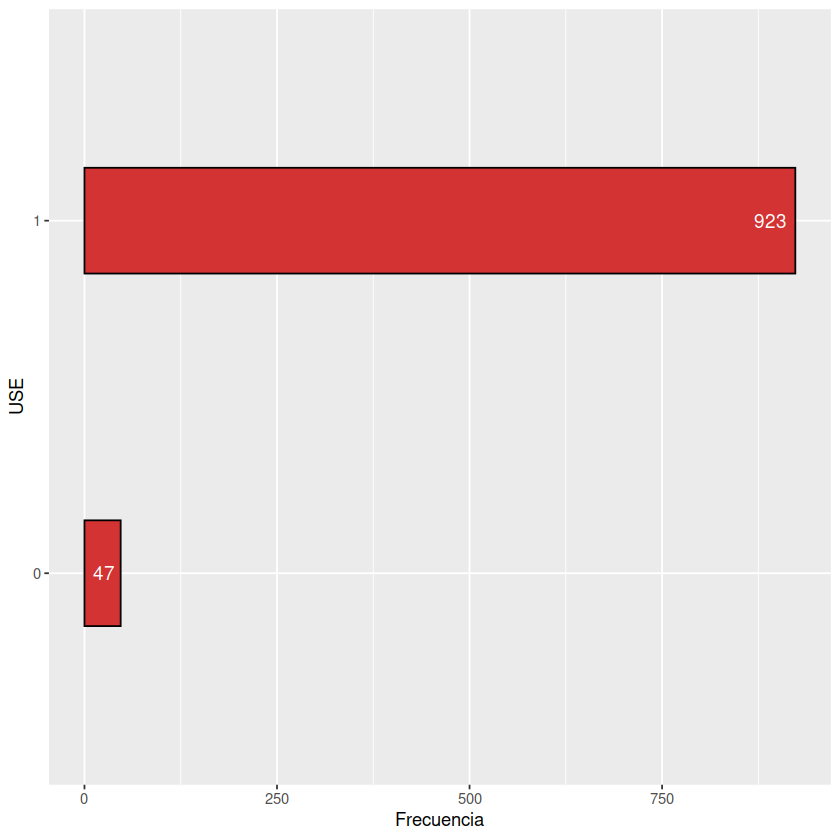

In [120]:
  act_char <- "use"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.3, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# VB

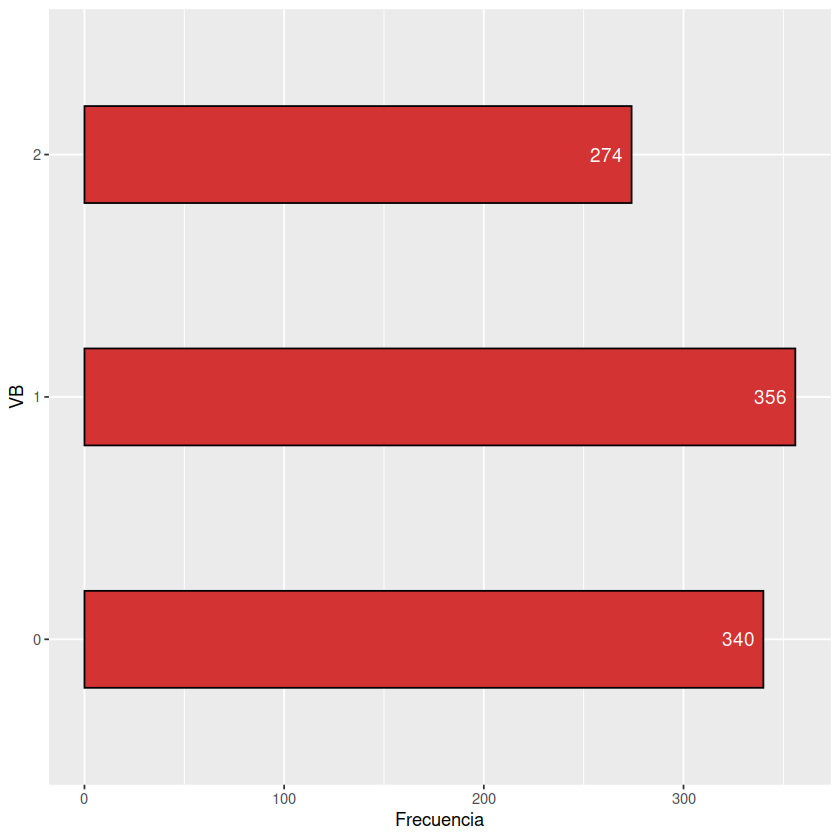

In [121]:
  act_char <- "vb"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.4, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# VM

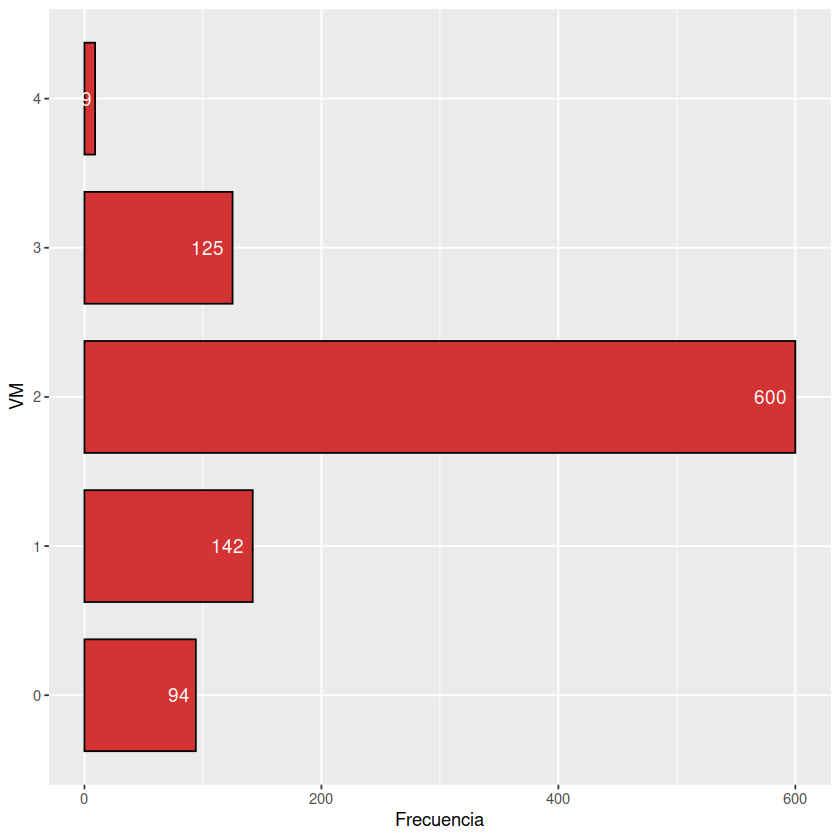

In [122]:
  act_char <- "vm"
  plt <- ggplot(ps_df_fct, aes(x=.data[[act_char]])) +
  geom_bar(stat = "count", width = 0.75, fill = "#d33333", color = "black") +
  labs(x = toupper(act_char), y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.25) +
  # facet_wrap(~ lat)
  coord_flip()
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", act_char, "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# Todd Phase

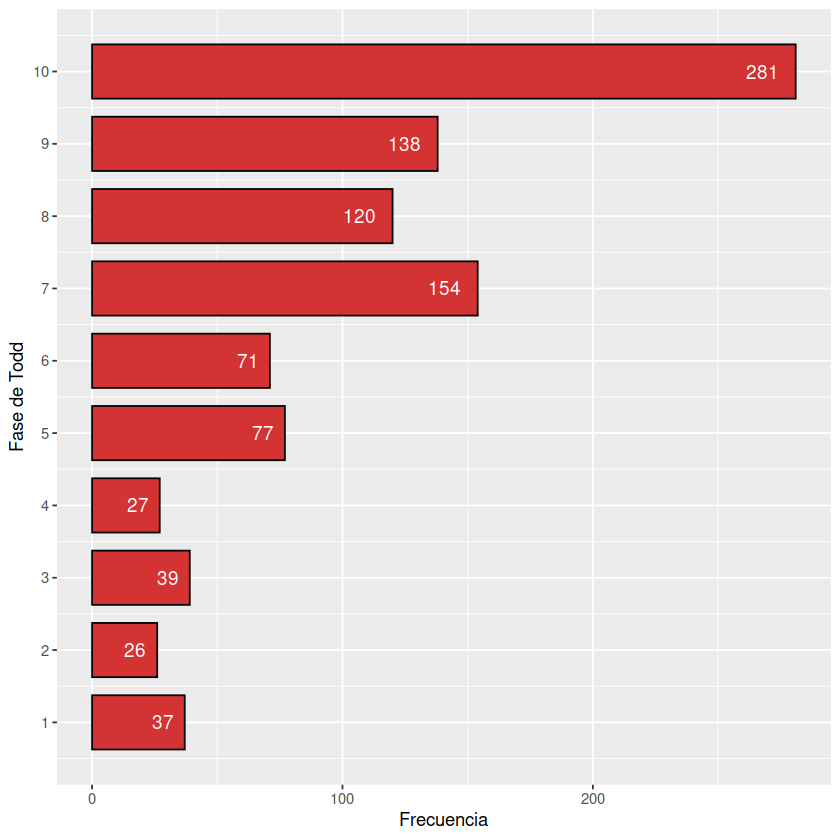

In [ ]:
  plt <- ggplot(ps_df_fct, aes(x=.data[["t_phase"]])) +
  geom_bar(stat = "count", width = 0.75, fill = "#d33333", color = "black") +
  labs(x = "Fase de Todd", y = "Frecuencia") +
  stat_count(geom = "text", colour = "#ffffff", size = 4, aes(label = ..count..), hjust=1.5) +
  scale_x_continuous(breaks = seq(1, 10, by = 1)) +
  coord_flip()
  
  print(plt)

  if(save)
  {
    save_path <- str_c("./eda_univar/char_", "t_phase", "_distr.pdf")
    ggsave(save_path, width = 8, height = 3)
  }

# Age

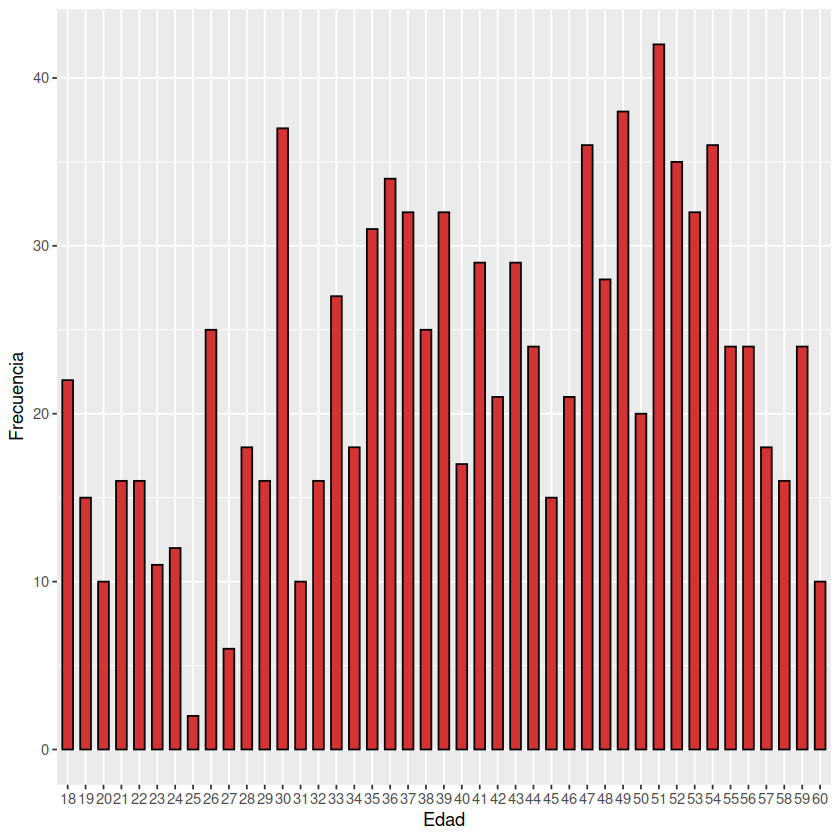

In [59]:
  plt <- ggplot(ps_df_fct, aes(x=.data[["age"]])) +
  geom_bar(stat = "count", width = 0.6, fill = "#d33333", color = "black") +
  labs(x = "Edad", y = "Frecuencia")
  
  print(plt)

  if(TRUE)
  {
    save_path <- str_c("./eda_univar/char_", "age", "_distr.pdf")
    ggsave(save_path, width = 8, height = 5)
  }